<center><h1>Last_First_HW5</h1></center>
<br>
<br>

Name: 
<br>Yitong Ouyang
Github Username: 
<br>Yvette0512
USC ID: 5837792934

## 1. Decision Trees as Interpretable Models

Import packages

### (a) Obtain Data

Get the Accute Inamations Data Set

In [74]:
import chardet

with open('./HW5_Datasets/diagnosis.data', 'rb') as f:
    result = chardet.detect(f.read())
    
print(result['encoding'])

UTF-16


In [75]:
import pandas as pd
import io
with open('./HW5_Datasets/diagnosis.data', 'r', encoding='utf-16') as file:
    data = file.read()

# data
df = pd.read_csv(io.StringIO(data), sep='\t', header=None) #header

# print(df.head())

# Create a dictionary to map the old column names to new column names
col_mapping = {
    0: 'Temperature',
    1: 'Nausea',
    2: 'Lumbra_Pain',
    3: 'Urine_pushing',
    4: 'Micturition_pains',
    5: 'Burning_swelling',
    6: 'Inflammation',
    7: 'Nephritis'
}

# Use the rename() method to apply the mapping to the DataFrame
df = df.rename(columns=col_mapping)
df = df.replace(',', '.', regex=True)

# print(df.head())
df

,Temperature,Nausea,Lumbra_Pain,Urine_pushing,Micturition_pains,Burning_swelling,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [76]:
df_encoded = df.replace('no', 0, regex=True)
df_encoded = df_encoded.replace('yes', 1, regex = True)
df_encoded

,Temperature,Nausea,Lumbra_Pain,Urine_pushing,Micturition_pains,Burning_swelling,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


### (b) Build a decision tree

In [77]:
my_dict = df_encoded.to_dict()
print(type(my_dict))

<class 'dict'>


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_text
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Split the data into features and target
X = df_encoded.drop(['Inflammation', 'Nephritis'], axis=1)
y = df_encoded[['Inflammation', 'Nephritis']]
              
# Create a DecisionTreeClassifier object and fit it to the data
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Print the tree
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- Temperature <= 37.95
|   |--- Urine_pushing <= 0.50
|   |   |--- class: 0
|   |--- Urine_pushing >  0.50
|   |   |--- class: 1
|--- Temperature >  37.95
|   |--- Lumbra_Pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbra_Pain >  0.50
|   |   |--- Nausea <= 0.50
|   |   |   |--- class: 0
|   |   |--- Nausea >  0.50
|   |   |   |--- Urine_pushing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Urine_pushing >  0.50
|   |   |   |   |--- class: 0



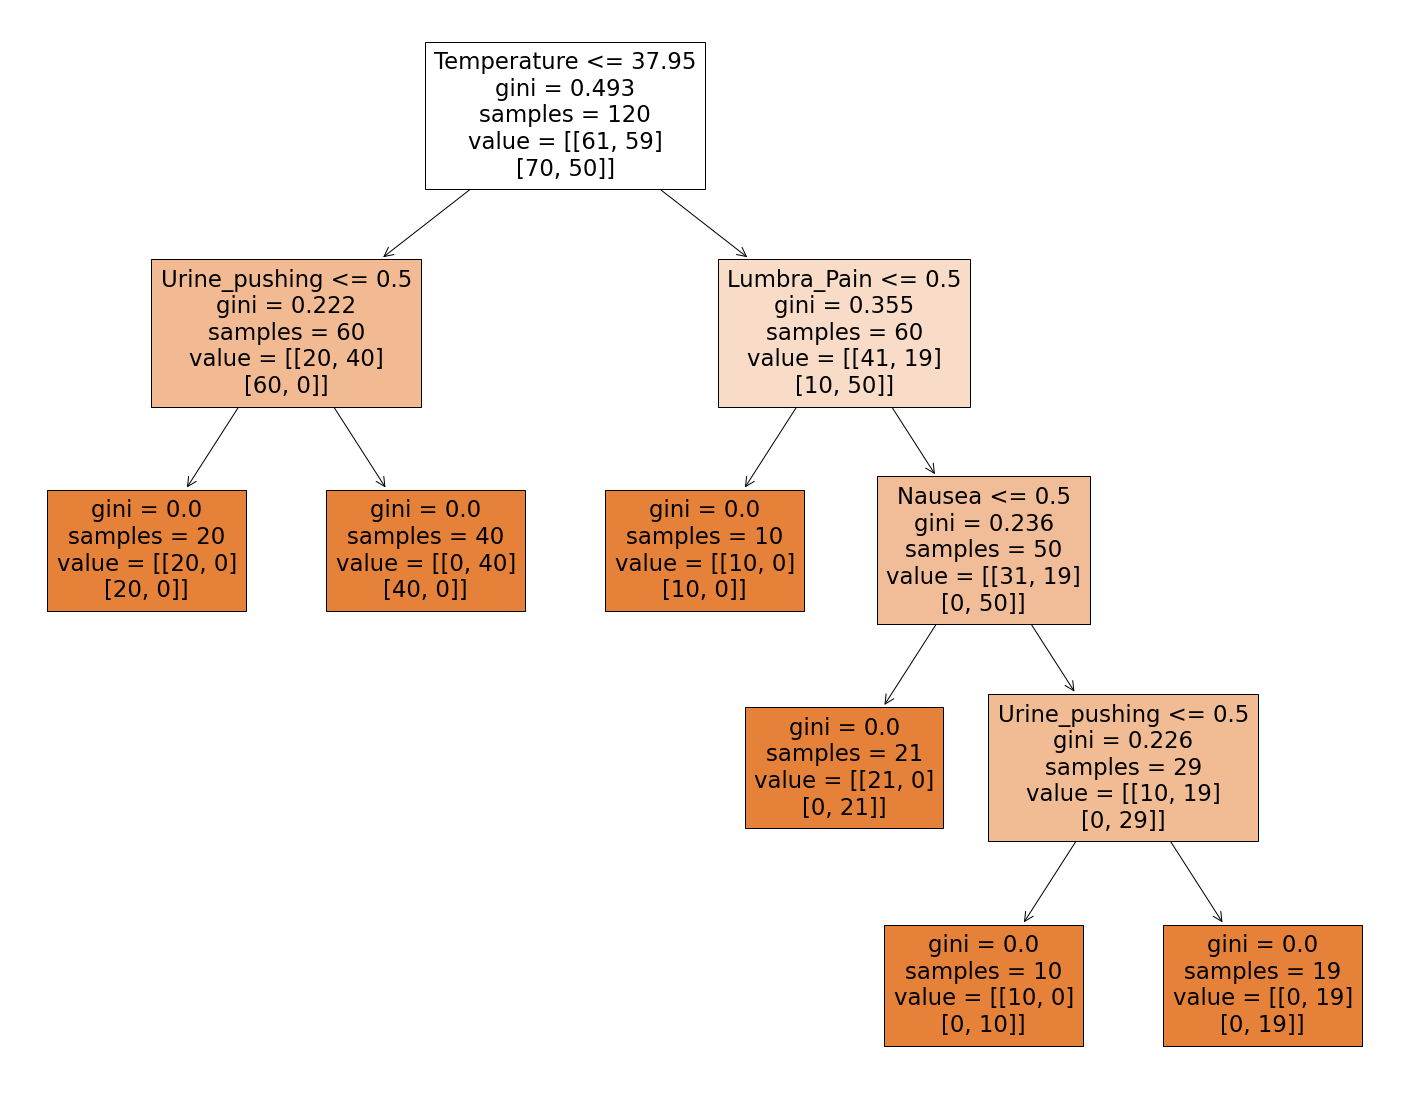

In [83]:
from sklearn import tree
fig = plt.figure(figsize = (25, 20))
_= tree.plot_tree(clf, feature_names=X.columns.tolist(), 
                  class_names=y.columns.tolist(), filled = True)

### (c) Convert the decision rules

In [24]:
#code provided by the instructor:

import numpy as np
from sklearn import datasets
from sklearn import tree
# Load iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Build decision tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=iris.feature_names)
dotfile.close()

In [25]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent = " " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else: # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

In [26]:
tree_to_code(dt, list(iris.feature_names))

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
 if petal length (cm) <= 2.449999988079071:
  return [[50.  0.  0.]]
 else: # if petal length (cm) > 2.449999988079071
  if petal width (cm) <= 1.75:
   if petal length (cm) <= 4.950000047683716:
    if petal width (cm) <= 1.6500000357627869:
     return [[ 0. 47.  0.]]
    else: # if petal width (cm) > 1.6500000357627869
     return [[0. 0. 1.]]
   else: # if petal length (cm) > 4.950000047683716
    if petal width (cm) <= 1.550000011920929:
     return [[0. 0. 3.]]
    else: # if petal width (cm) > 1.550000011920929
     if sepal length (cm) <= 6.949999809265137:
      return [[0. 2. 0.]]
     else: # if sepal length (cm) > 6.949999809265137
      return [[0. 0. 1.]]
  else: # if petal width (cm) > 1.75
   if petal length (cm) <= 4.8500001430511475:
    if sepal width (cm) <= 3.100000023841858:
     return [[0. 0. 2.]]
    else: # if sepal width (cm) > 3.100000023841858
     return [[0. 1. 0.]]
   els

In [27]:
def tree_to_pseudo(tree, feature_names):
    '''
     Outputs a decision tree model as if/then pseudocode
     Parameters:
     -----------
     tree: decision tree model
     The decision tree to represent as pseudocode
     feature_names: list
     The feature names of the dataset used for building the decision tree
     '''
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
#     print(type(features))
    value = tree.tree_.value
    def recurse(left, right, threshold, features, node, depth=0):
        indent = " " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + str(features[node]) + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
            else:
                    print(indent,"return " + str(value[node]))
    recurse(left, right, threshold, features, 0)

#For the remainder of this example, we remove the last element in clfs and ccp_alphas, 
#because it is the trivial tree with only one node.

In [28]:
feature_names = ['Temperature','Nausea','Lumbra_Pain',
                 'Urine_pushing','Micturition_pains', 'Burning_swelling',
                 'Inflammation', 'Nephritis']
tree_to_pseudo(clf, feature_names)

 if ( Temperature <= 37.95000076293945 ) {
  if ( Urine_pushing <= 0.5 ) {
  } else {
  }
 } else {
  if ( Lumbra_Pain <= 0.5 ) {
  } else {
   if ( Nausea <= 0.5 ) {
   } else {
    if ( Urine_pushing <= 0.5 ) {
    } else {
    }
   }
  }
 }


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

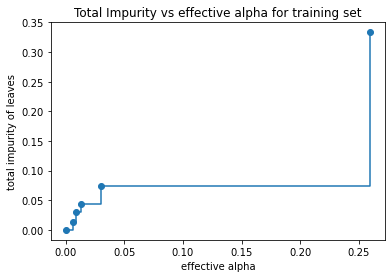

In [30]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.25979602791196993


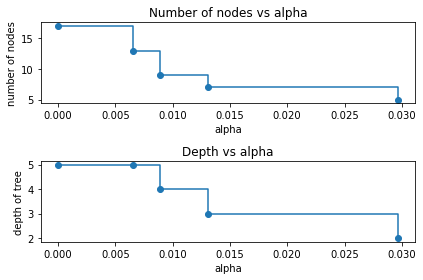

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data: Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [36]:
df_com = pd.read_csv('./HW5_Datasets/communities.data', header = None) #could I just leave the columns names?
df_com

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [37]:
df_com.replace('?', None, inplace=True) #what is inplace?
df_com

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,None,None,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,None,None,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,None,None,None,None,0.00,None,0.67
2,24,None,None,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,None,None,None,None,0.00,None,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,None,None,None,None,0.00,None,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,None,None,None,None,0.00,None,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,None,None,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,None,None,None,None,0.00,None,0.09
1990,6,None,None,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,None,None,None,None,0.00,None,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [38]:
df_com_train = df_com.iloc[:1493]
df_com_train.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,None,None,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,None,None,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,None,None,None,None,0.00,None,0.67
2,24,None,None,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,None,None,None,None,0.00,None,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,None,None,None,None,0.00,None,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,None,None,None,None,0.00,None,0.03


In [39]:
df_com_test = df_com.iloc[1493:]
df_com_test.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,None,None,None,None,0.00,None,0.03
1494,34,17,79610,WestNewYorktown,8,0.05,0.43,0.08,0.65,0.12,...,0.00,1.00,1.00,0,0.01,0.77,0,0.51,0.18,0.23
1495,6,None,None,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,None,None,None,None,0.00,None,0.12
1496,48,None,None,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,None,None,None,None,0.00,None,0.11
1497,35,None,None,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,None,None,None,None,0.00,None,0.12


In [40]:
#test and training:

### (b) Missing values

In [41]:
df_com.isnull().sum()

0         0
1      1174
2      1177
3         0
4         0
       ... 
123    1675
124    1675
125       0
126    1675
127       0
Length: 128, dtype: int64

In [43]:
df_com.drop([3], axis=1, inplace = True) #do it to the variable
df_com

,0,1,2,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
0,8,None,None,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,None,None,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,None,None,None,None,0.00,None,0.67
2,24,None,None,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,None,None,None,None,0.00,None,0.43
3,34,5,81440,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,None,None,None,None,0.00,None,0.12
4,42,95,6096,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,None,None,None,None,0.00,None,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,None,None,10,0.01,0.40,0.10,0.87,0.12,0.16,...,0.01,0.28,0.05,None,None,None,None,0.00,None,0.09
1990,6,None,None,10,0.05,0.96,0.46,0.28,0.83,0.32,...,0.02,0.37,0.20,None,None,None,None,0.00,None,0.45
1991,9,9,80070,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [44]:
list_com = df_com.values.tolist()
print(list_com)

[[8, None, None, 1, 0.19, 0.33, 0.02, 0.9, 0.12, 0.17, 0.34, 0.47, 0.29, 0.32, 0.2, 1.0, 0.37, 0.72, 0.34, 0.6, 0.29, 0.15, 0.43, 0.39, 0.4, 0.39, 0.32, 0.27, 0.27, '0.36', 0.41, 0.08, 0.19, 0.1, 0.18, 0.48, 0.27, 0.68, 0.23, 0.41, 0.25, 0.52, 0.68, 0.4, 0.75, 0.75, 0.35, 0.55, 0.59, 0.61, 0.56, 0.74, 0.76, 0.04, 0.14, 0.03, 0.24, 0.27, 0.37, 0.39, 0.07, 0.07, 0.08, 0.08, 0.89, 0.06, 0.14, 0.13, 0.33, 0.39, 0.28, 0.55, 0.09, 0.51, 0.5, 0.21, 0.71, 0.52, 0.05, 0.26, 0.65, 0.14, 0.06, 0.22, 0.19, 0.18, 0.36, 0.35, 0.38, 0.34, 0.38, 0.46, 0.25, 0.04, 0.0, 0.12, 0.42, 0.5, 0.51, 0.64, '0.03', '0.13', '0.96', '0.17', '0.06', '0.18', '0.44', '0.13', '0.94', '0.93', '0.03', '0.07', '0.1', '0.07', '0.02', '0.57', '0.29', 0.12, 0.26, 0.2, '0.06', '0.04', '0.9', '0.5', 0.32, '0.14', 0.2], [53, None, None, 1, 0.0, 0.16, 0.12, 0.74, 0.45, 0.07, 0.26, 0.59, 0.35, 0.27, 0.02, 1.0, 0.31, 0.72, 0.11, 0.45, 0.25, 0.29, 0.39, 0.29, 0.37, 0.38, 0.33, 0.16, 0.3, '0.22', 0.35, 0.01, 0.24, 0.14, 0.24, 0.3, 

In [45]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
com_imp = IterativeImputer(max_iter=10, random_state=0)
com_imp = com_imp.fit(list_com)
# IterativeImputer(random_state=0)
# # the model learns that the second feature is double the first
# print(np.round(imp.transform(list_com)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [46]:
com_imp.transform(list_com).shape

(1994, 127)

In [47]:
list_com_imp = com_imp.transform(list_com)
list_com_imp

array([[ 8.00000000e+00,  1.62046746e+02,  4.86929291e+04, ...,
         3.20000000e-01,  1.40000000e-01,  2.00000000e-01],
       [ 5.30000000e+01,  1.02333688e+02,  4.70165719e+04, ...,
         0.00000000e+00,  2.33217299e-01,  6.70000000e-01],
       [ 2.40000000e+01,  2.54593168e+02,  5.06242628e+04, ...,
         0.00000000e+00,  2.75906390e-01,  4.30000000e-01],
       ...,
       [ 9.00000000e+00,  9.00000000e+00,  8.00700000e+04, ...,
         9.10000000e-01,  2.80000000e-01,  2.30000000e-01],
       [ 2.50000000e+01,  1.70000000e+01,  7.26000000e+04, ...,
         2.20000000e-01,  1.80000000e-01,  1.90000000e-01],
       [ 6.00000000e+00, -1.50462221e+02,  4.17538720e+04, ...,
         1.00000000e+00,  1.30000000e-01,  4.80000000e-01]])

In [48]:
df_com_imp = pd.DataFrame(list_com_imp)
df_com_imp

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,8.0,162.046746,48692.929127,1.0,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53.0,102.333688,47016.571924,1.0,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,0.093286,0.031366,0.914245,0.545521,0.00,0.233217,0.67
2,24.0,254.593168,50624.262848,1.0,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,0.083216,-0.006767,1.182858,0.507381,0.00,0.275906,0.43
3,34.0,5.000000,81440.000000,1.0,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,0.100594,0.027444,0.871388,0.471438,0.00,0.219947,0.12
4,42.0,95.000000,6096.000000,1.0,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,0.039364,0.011747,0.802949,0.275376,0.00,0.166434,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12.0,85.223057,46947.464805,10.0,0.01,0.40,0.10,0.87,0.12,0.16,...,0.01,0.28,0.05,0.068406,0.020708,0.549728,0.456045,0.00,0.184619,0.09
1990,6.0,294.338815,51638.762080,10.0,0.05,0.96,0.46,0.28,0.83,0.32,...,0.02,0.37,0.20,0.090740,0.041365,0.684239,0.549737,0.00,0.226407,0.45
1991,9.0,9.000000,80070.000000,10.0,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,25.0,17.000000,72600.000000,10.0,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [49]:
list_names = []
with open('./HW5_Datasets/communities.names.mydoc', 'r') as f:
    data = f.read()
    lines = data.split('\n')
    attributes = lines[0].split(',')
    for a in attributes:
        print(a)

@attribute state numeric


### (c) Plot a correlation matrix

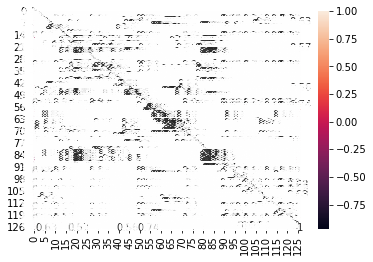

In [50]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(df_com_imp.corr(), annot=True)
plt.show()

### (d) Calculate the Coefficient of Variation CV:Calculate the Coefficient of Variation CV for each feature, where CV = ms , in which s is sample standard deviation and m is sample mean..

In [52]:
#define function to calculate cv
import numpy as np

def cv(x):
    return np.std(x, ddof=1) / np.mean(x) * 100

list_cv = []
list_highest_cv = []
highest_cv = 0

for i in list_com_imp:
    curr_cv = cv(i)
    list_cv.append(curr_cv)
    if curr_cv > highest_cv:
        highest_cv = curr_cv
        list_highest_cv = i

# print(highest_cv)
# print(list_highest_cv)
print('list of cv:', list_cv)

list of cv: [1122.0090810571533, 1122.1929304647194, 1119.8290366516408, 1125.713988770453, 1094.7732558085936, 1121.9355310893347, 1124.4078261646137, 1131.6572513625151, 1119.1474222932475, 1121.9582841461659, 1130.2780203558377, 1125.4330349173165, 1124.5451828219582, 1120.1556751723788, 1120.811768182663, 1123.900462005173, 1041.0487316566293, 1119.9299063522699, 1126.852925624403, 1123.399234604022, 1119.6315195935065, 1124.624761004404, 1121.9267117966588, 1123.863903545216, 1122.6425364868294, 1123.6883566264244, 1127.0767769011452, 1124.9803108531855, 1114.9935101309852, 1123.9475690221097, 1117.6018652301527, 1127.7517773307852, 1118.960096548195, 1108.921332744243, 1119.4428753903608, 1122.5586449621833, 1124.953096286574, 1127.1536012414053, 1116.6858379223947, 1124.9868150476984, 1124.077845904727, 1122.290484906262, 1119.7535545734902, 1119.2176473085542, 1125.199641420508, 1122.139510245142, 1125.7429022905947, 1119.188356948768, 1123.2233763379202, 1118.959561146355, 112

### (e) Scatter plots and box plots for highest CV features, Can you draw conclusions about significance of those features, just by the scatter plots?

In [53]:
list_cv.sort(reverse=True)
list_cv = list_cv[:11]
list_cv

[1147.8611700687343,
 1147.11155027308,
 1144.8002344434817,
 1142.1205257753961,
 1140.4552016744747,
 1139.5140779626,
 1137.1684847357167,
 1136.9253200021212,
 1136.0494237653927,
 1135.9627488844924,
 1135.490619910188]

<AxesSubplot:>

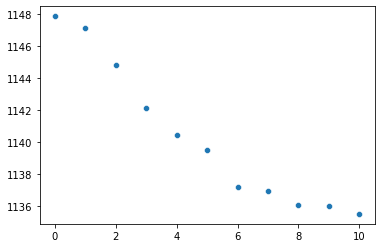

In [54]:
# sn.scatterplot(data=list_cv, x='features', y= 'values of CV') ?????
sn.scatterplot(data=list_cv)

<AxesSubplot:>

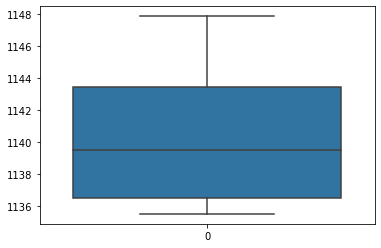

In [55]:
sn.boxplot(data=list_cv)

In [56]:
# Can you draw conclusions about significance of those features, just by the scatter plots?

### (f) Fit a linear model : Fit a linear model using least squares to the training set and report the test error.

In [57]:
df_com_train = df_com_imp.iloc[:1493]
df_com_train.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,8.0,162.046746,48692.929127,1.0,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53.0,102.333688,47016.571924,1.0,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,0.093286,0.031366,0.914245,0.545521,0.00,0.233217,0.67
2,24.0,254.593168,50624.262848,1.0,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,0.083216,-0.006767,1.182858,0.507381,0.00,0.275906,0.43
3,34.0,5.000000,81440.000000,1.0,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,0.100594,0.027444,0.871388,0.471438,0.00,0.219947,0.12
4,42.0,95.000000,6096.000000,1.0,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,0.039364,0.011747,0.802949,0.275376,0.00,0.166434,0.03


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#find the test error:
df_com_test = df_com_imp.iloc[1493:]
df_com_test.head()

# Extract features and target variable from both dataframes
X_train = df_com_train.iloc[:,:-1]
y_train = df_com_train.iloc[:, -1]
X_test = df_com_test.iloc[:,:-1]
y_test = df_com_test.iloc[:, -1]

# Train machine learning model on training dataset
model = LinearRegression()
model.fit(X_train, y_train)

# Use trained model to predict target variable of test dataset
y_pred = model.predict(X_test)

# Calculate error between predicted target variable and actual target variable in test dataset
test_error = mean_squared_error(y_test, y_pred)
print('Test error:', test_error)

Test error: 0.03165430881347018


### (g) Fit a ridge regression model

In [59]:
from sklearn.linear_model import RidgeCV

# Fit a ridge regression model with lambda chosen by cross-validation
model = RidgeCV(alphas=[0.1, 1.0, 10.0])
model.fit(X_train, y_train)

# Use trained model to predict target variable of test dataset
y_pred = model.predict(X_test)

# Calculate error between predicted target variable and actual target variable in test dataset
test_error = mean_squared_error(y_test, y_pred)
print('Test error:', test_error)

Test error: 0.014231979728141605


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1911: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha**-1)


### (h) Fit a LASSO model: Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.

In [60]:
from sklearn.linear_model import LassoCV

# Fit a LASSO model with lambda chosen by cross-validation
model = LassoCV(cv=5)
model.fit(X_train, y_train)

# Use trained model to predict target variable of test dataset
y_pred = model.predict(X_test)

# Calculate error between predicted target variable and actual target variable in test dataset
test_error = mean_squared_error(y_test, y_pred)
print('Test error:', test_error)

# Get a list of the variables selected by the model
selected_features = X_train.columns[model.coef_ != 0]
print('Selected features:', selected_features)

Test error: 0.020998194601045045
Selected features: Int64Index([0, 1, 2, 7, 48, 54], dtype='int64')


### standardized and do the LASSO again

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

X_train_s = pd.DataFrame(X_train_s)
X_test_s = pd.DataFrame(X_test_s)

# Fit a LASSO model with lambda chosen by cross-validation
model = LassoCV(cv=5)
model.fit(X_train_s, y_train)

# Use trained model to predict target variable of test dataset
y_pred = model.predict(X_test_s)

# Calculate error between predicted target variable and actual target variable in test dataset
test_error = mean_squared_error(y_test, y_pred)
print('Test error of Standardized:', test_error)

# Get a list of the variables selected by the model
selected_features = X_train_s.columns[model.coef_ != 0]
print('Selected features of Standardized:', selected_features)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021104516103587656, tolerance: 0.006786747780569514
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014389410620253784, tolerance: 0.006688769614740369
  model = cd_fast.enet_coordinate_descent_gram(


Test error of Standardized: 0.015214982131054145
Selected features of Standardized: Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  13,  15,
             18,  19,  21,  22,  25,  26,  27,  28,  29,  30,  33,  36,  37,
             38,  39,  40,  41,  42,  43,  45,  47,  48,  49,  50,  51,  52,
             54,  55,  56,  58,  59,  60,  61,  64,  65,  67,  68,  70,  71,
             72,  73,  74,  75,  76,  78,  80,  82,  83,  85,  86,  88,  89,
             90,  91,  92,  94,  95,  96,  97,  99, 100, 101, 103, 104, 106,
            108, 109, 111, 112, 113, 115, 117, 118, 119, 120, 121, 122, 123,
            124, 125],
           dtype='int64')


### (i) Fit a PCR model

In [63]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the PCR model
n_components = 5
pca = PCA(n_components=n_components)
scaler = StandardScaler()
lr = LinearRegression()

# Create the pipeline
pipeline = Pipeline(steps=[('pca', pca), ('scaler', scaler), ('lr', lr)])

# Fit the model to the data
pipeline.fit(X_train, y_train)

# Predict on new data
# X_test = np.random.rand(10).reshape(1, -1) # new data with 10 features
predicted_y = pipeline.predict(X_test)
MSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('test error of PCA:', MSE)

test error of PCA: 0.12053332898321878


### (j) Fit a boosting tree

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an instance of the GradientBoostingRegressor algorithm
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.1)

# Note that the alpha parameter is used to perform L1 regularization

# Set up the parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.9]}

# Perform cross-validation using GridSearchCV
grid_search = GridSearchCV(gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best value of alpha and the corresponding mean squared error
print('Best alpha:', grid_search.best_params_['alpha'])
print('MSE:', -grid_search.best_score_)

Best alpha: 0.9
MSE: 0.018770196387481883


In [69]:
# Fit the GradientBoostingRegressor model using the optimal value of alpha
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=grid_search.best_params_['alpha'])
gbr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbr.predict(X_test)

# Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.014558843519928144
Mean Absolute Error: 0.08405720499153975
R-squared: 0.6931441439272186
